# Part 2: Machine Learning

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import math
import matplotlib.pyplot as plt
sb.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.neural_network import MLPRegressor


from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn import preprocessing

### Importing CSV File Containing Wine Data

In [2]:
wineNew_ohe = pd.read_csv('data/wineNew_ohe.csv')

In [3]:
wineNew_ohe

,index,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type,...,Country_Austria,Country_Chile,Country_France,Country_Germany,Country_Italy,Country_New Zealand,Country_Portugal,Country_South Africa,Country_Spain,Country_United States
0,0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,Red,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,Red,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,Red,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,Red,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,Red,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13536,13829,Special Cuvée Brut Aÿ Champagne N.V.,France,Champagne,Bollinger,4.2,37765,46.00,2023,Sparkling,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13537,13830,Brut Premier Champagne N.V.,France,Champagne Premier Cru,Louis Roederer,4.2,40004,36.48,2023,Sparkling,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13538,13831,Impérial Brut Champagne N.V.,France,Champagne,Moët & Chandon,4.1,76037,40.61,2023,Sparkling,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13539,13832,Brut (Carte Jaune) Champagne N.V.,France,Champagne,Veuve Clicquot,4.2,86839,43.60,2023,Sparkling,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Storing OHE country variable names

In [4]:
country_list = list(wineNew_ohe.columns[10:])
print(country_list)

['Country_Argentina', 'Country_Australia', 'Country_Austria', 'Country_Chile', 'Country_France', 'Country_Germany', 'Country_Italy', 'Country_New Zealand', 'Country_Portugal', 'Country_South Africa', 'Country_Spain', 'Country_United States']


# A. Linear Regression
<hr style="border:1px solid gray">

### Year, Rating and Country (Predictors) vs Price (Response)

Intercept of Regression 	: b =  [128.50687938]
Coefficients of Regression 	: a =  [[-0.06593236  1.89802957 -0.07048783  0.22140798  0.0593145  -0.02643008
   0.28960033 -0.03852719 -0.07554442  0.0309579  -0.33323591 -0.099092
  -0.17834295  0.22037968]]

               Predictors  Coefficients
0                    Year     -0.065932
1                  Rating      1.898030
2       Country_Argentina     -0.070488
3       Country_Australia      0.221408
4         Country_Austria      0.059314
5           Country_Chile     -0.026430
6          Country_France      0.289600
7         Country_Germany     -0.038527
8           Country_Italy     -0.075544
9     Country_New Zealand      0.030958
10       Country_Portugal     -0.333236
11   Country_South Africa     -0.099092
12          Country_Spain     -0.178343
13  Country_United States      0.220380



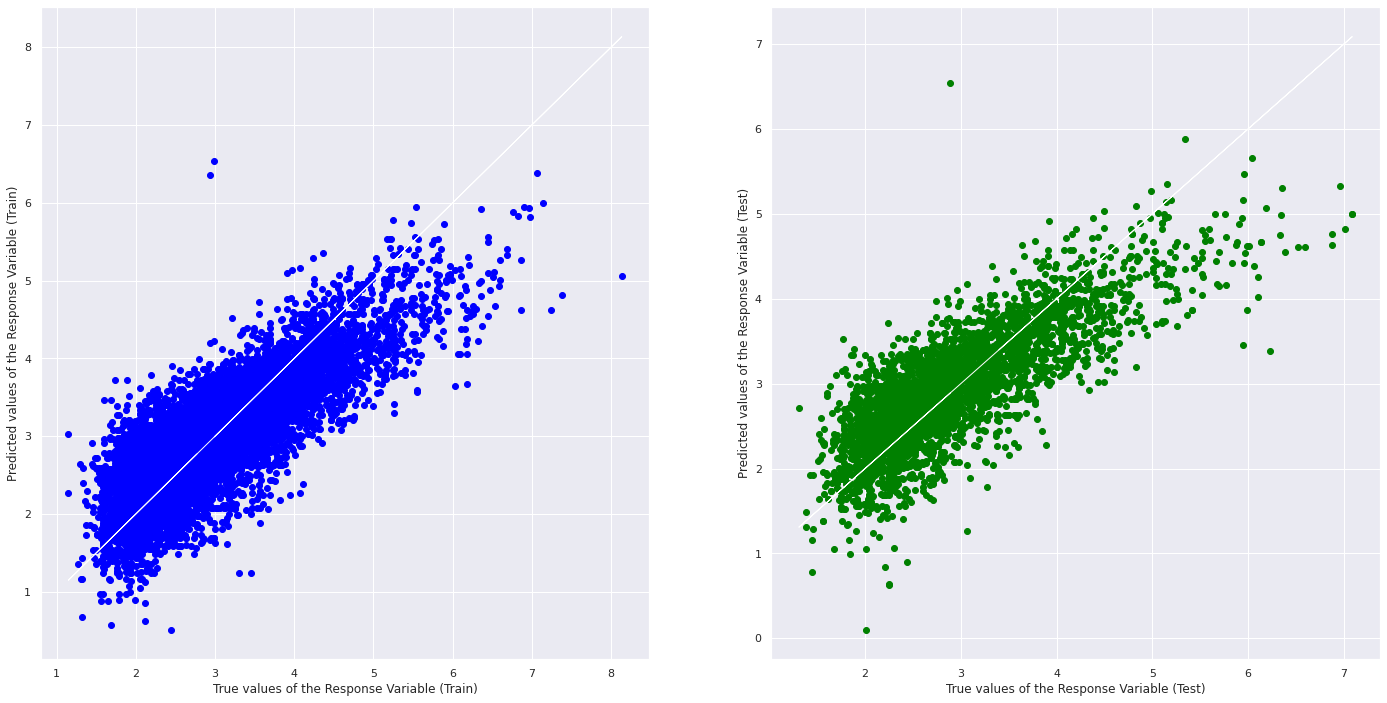

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6660575927079705
Mean Squared Error (MSE) 	: 0.263608121597844

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6494702095775933
Mean Squared Error (MSE) 	: 0.26860198419093123



In [5]:
predictors = ["Year", "Rating",] + country_list
y = pd.DataFrame(wineNew_ohe['Price'])
y = np.log(y)
X = pd.DataFrame(wineNew_ohe[predictors])
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X, y, test_size = 0.25)

linreg_combined = LinearRegression()         # create the linear regression object
linreg_combined.fit(X_train_combined, y_train_combined)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg_combined.intercept_)
print('Coefficients of Regression \t: a = ', linreg_combined.coef_)
print()

print(pd.DataFrame(list(zip(X_train_combined.columns, linreg_combined.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred_combined = linreg_combined.predict(X_train_combined)
y_test_pred_combined = linreg_combined.predict(X_test_combined)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_combined, y_train_pred_combined, color = "blue")
axes[0].plot(y_train_combined, y_train_combined, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test_combined, y_test_pred_combined, color = "green")
axes[1].plot(y_test_combined, y_test_combined, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg_combined.score(X_train_combined, y_train_combined))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_combined, y_train_pred_combined))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg_combined.score(X_test_combined, y_test_combined))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_combined, y_test_pred_combined))
print()

There is a moderate linear relationship between all the predictors, and the response. The best result is achieved by fitting data from Year, Rating, and Country, out of all linear regression models.

However, goodness of fit is not very high even when predicting on the Train dataset, as the original data has high STD from the linear regression line.

---
### Year, Rating (Predictors) vs Price (Response)

Intercept of Regression 	: b =  [133.36696402]
Coefficients of Regression 	: a =  [[-0.06842901  1.9501418 ]]

  Predictors  Coefficients
0       Year     -0.068429
1     Rating      1.950142



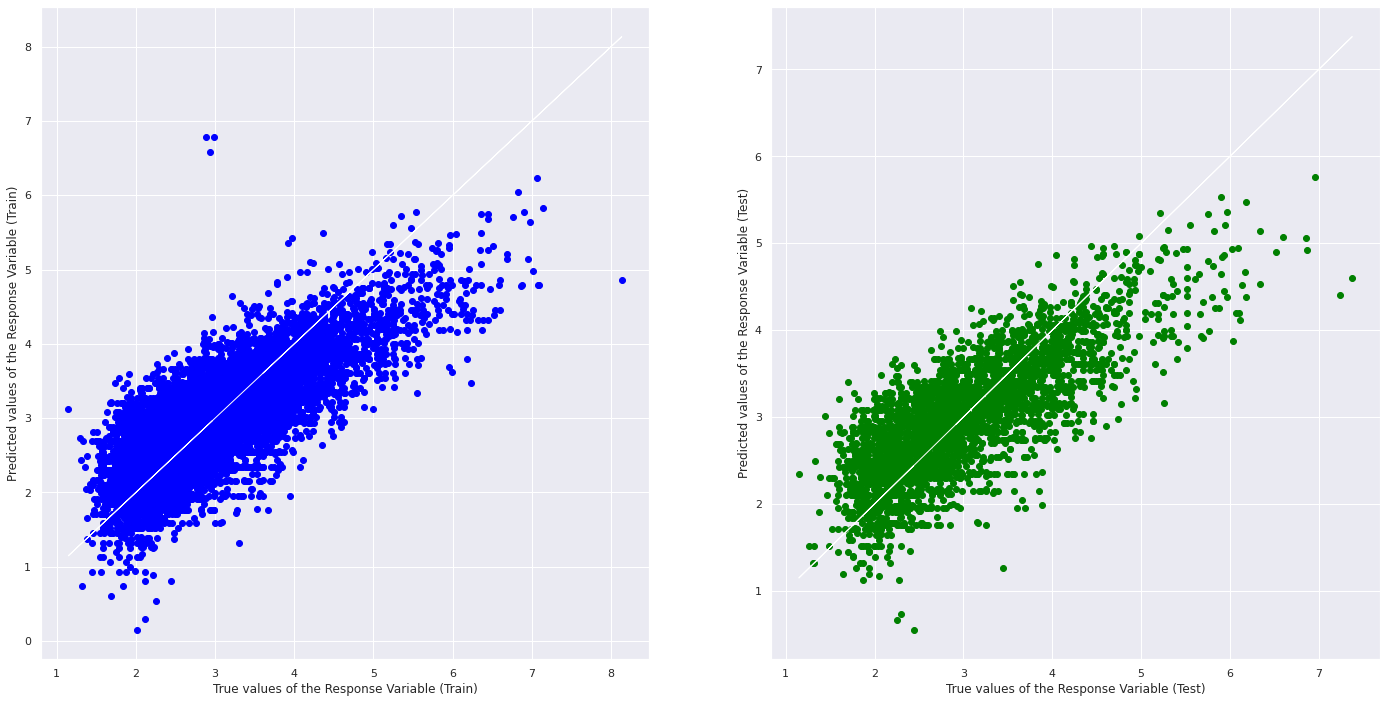

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6207178406947491
Mean Squared Error (MSE) 	: 0.2957864819856611

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.615904681179995
Mean Squared Error (MSE) 	: 0.305239938523097



In [6]:

y = pd.DataFrame(wineNew_ohe['Price'])
y = np.log(y)
X = pd.DataFrame(wineNew_ohe[["Year", "Rating"]])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Year and Rating provided moderate linear correlation with Price. This combination yielded the 2nd best linear correlation, considering R^2 and MSE values.

---
### Rating and Country (Predictors) vs Price (Response)

Intercept of Regression 	: b =  [-2.63275771e+12]
Coefficients of Regression 	: a =  [[2.17050740e+00 2.63275771e+12 2.63275771e+12 2.63275771e+12
  2.63275771e+12 2.63275771e+12 2.63275771e+12 2.63275771e+12
  2.63275771e+12 2.63275771e+12 2.63275771e+12 2.63275771e+12
  2.63275771e+12]]

               Predictors  Coefficients
0                  Rating  2.170507e+00
1       Country_Argentina  2.632758e+12
2       Country_Australia  2.632758e+12
3         Country_Austria  2.632758e+12
4           Country_Chile  2.632758e+12
5          Country_France  2.632758e+12
6         Country_Germany  2.632758e+12
7           Country_Italy  2.632758e+12
8     Country_New Zealand  2.632758e+12
9        Country_Portugal  2.632758e+12
10   Country_South Africa  2.632758e+12
11          Country_Spain  2.632758e+12
12  Country_United States  2.632758e+12



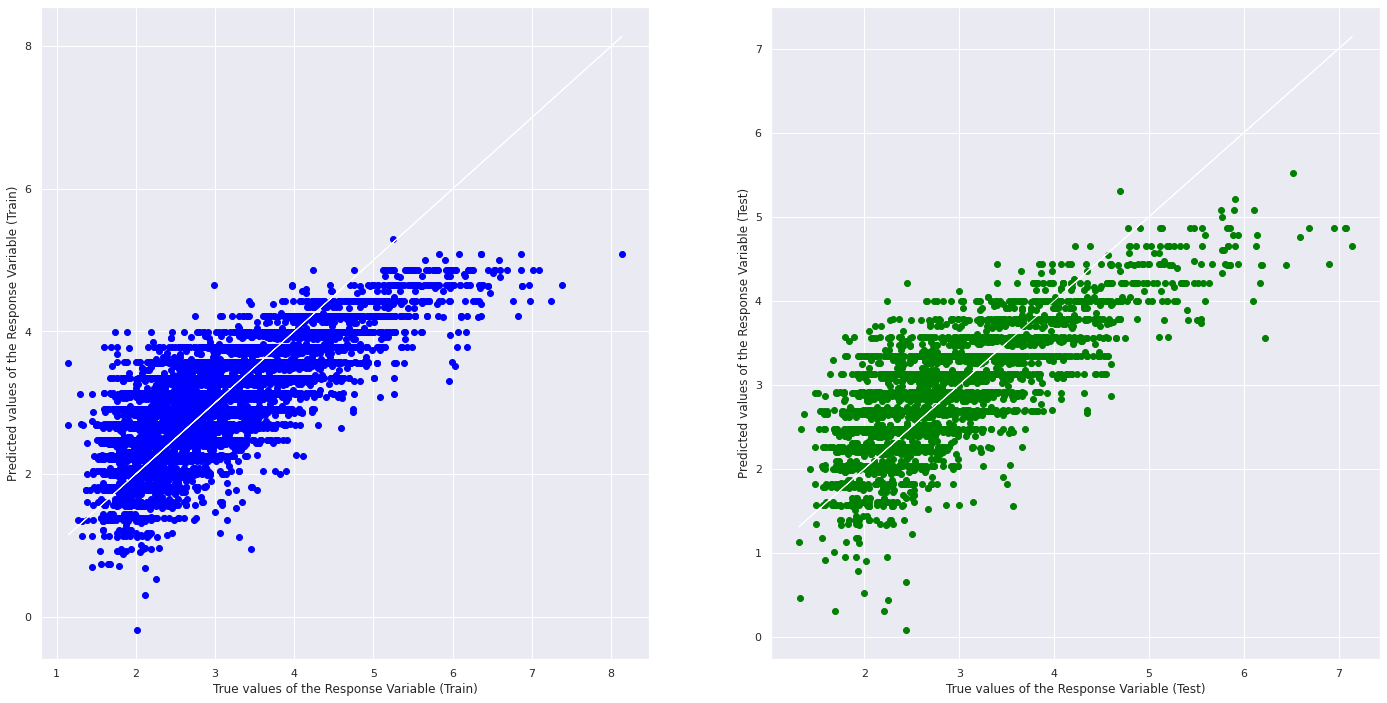

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6068520787163956
Mean Squared Error (MSE) 	: 0.31145341938743

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5902758832109752
Mean Squared Error (MSE) 	: 0.3098203824892761



In [7]:

y = pd.DataFrame(wineNew_ohe['Price'])
y = np.log(y)
X = pd.DataFrame(wineNew_ohe[["Rating"]+country_list])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Rating and Country also provided moderate linear correlation with Price. However, it was slightly worse than Rating and Year, which is not surprising given that Country on its own has a slightly worse correlation with Price compared to Year.

---
### Year and Country (Predictors) vs Price (Response)

Intercept of Regression 	: b =  [226.95652604]
Coefficients of Regression 	: a =  [[-0.11114348 -0.11806656  0.08897215  0.03621845 -0.21663492  0.41154547
   0.03169282 -0.00570994  0.1170827  -0.2815372  -0.12486952 -0.2652438
   0.32655036]]

               Predictors  Coefficients
0                    Year     -0.111143
1       Country_Argentina     -0.118067
2       Country_Australia      0.088972
3         Country_Austria      0.036218
4           Country_Chile     -0.216635
5          Country_France      0.411545
6         Country_Germany      0.031693
7           Country_Italy     -0.005710
8     Country_New Zealand      0.117083
9        Country_Portugal     -0.281537
10   Country_South Africa     -0.124870
11          Country_Spain     -0.265244
12  Country_United States      0.326550



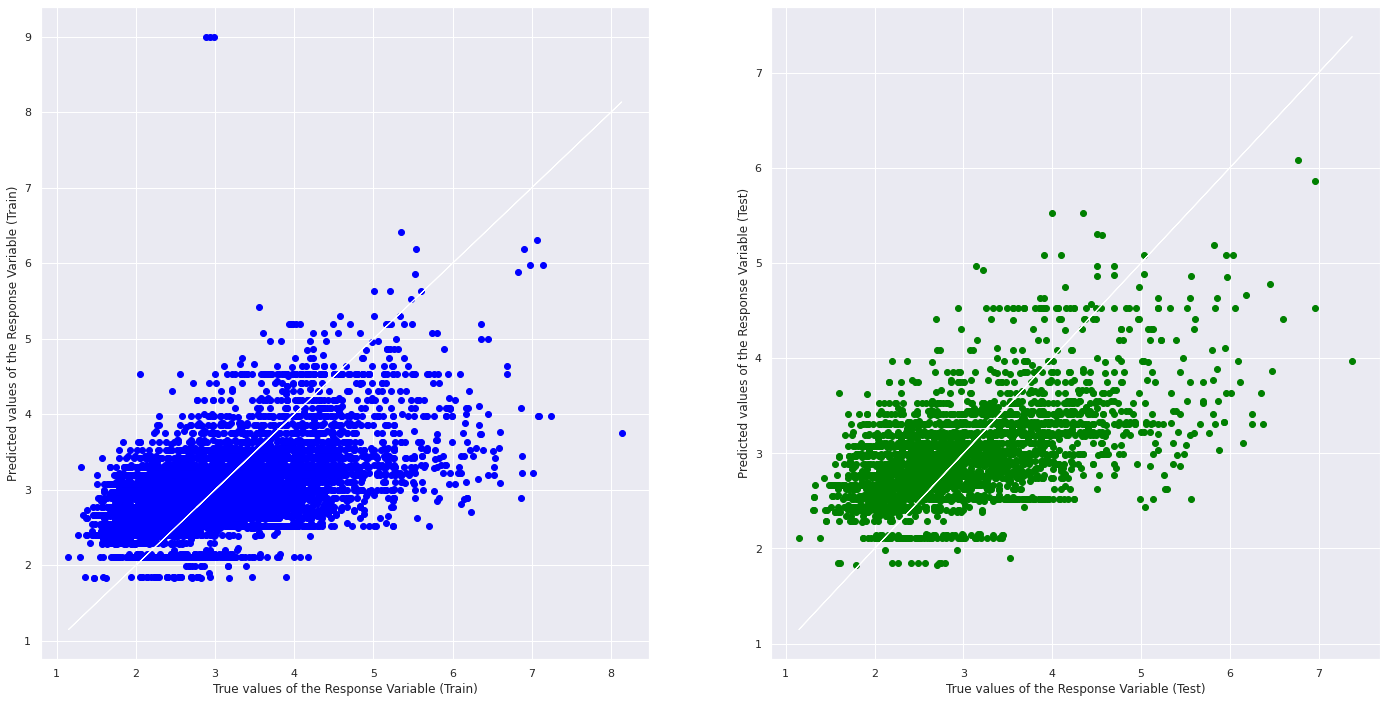

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3059847707776536
Mean Squared Error (MSE) 	: 0.5454898604904477

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3285168675151767
Mean Squared Error (MSE) 	: 0.5210135669495594



In [8]:

y = pd.DataFrame(wineNew_ohe['Price'])
y = np.log(y)
X = pd.DataFrame(wineNew_ohe[["Year"]+country_list])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Year and Country had a low linear correlation with Price. This R^2 is almost half of the R^2 of Rating with Year/Country, which was expected given that Rating has a much stronger correlation compared to Year/Country as seen in our EDA.

---
### Year (Predictor) vs Price (Response)

Intercept of Regression 	: b =  [250.69155527]
Coefficients of Regression 	: a =  [[-0.12288752]]

  Predictors  Coefficients
0       Year     -0.122888



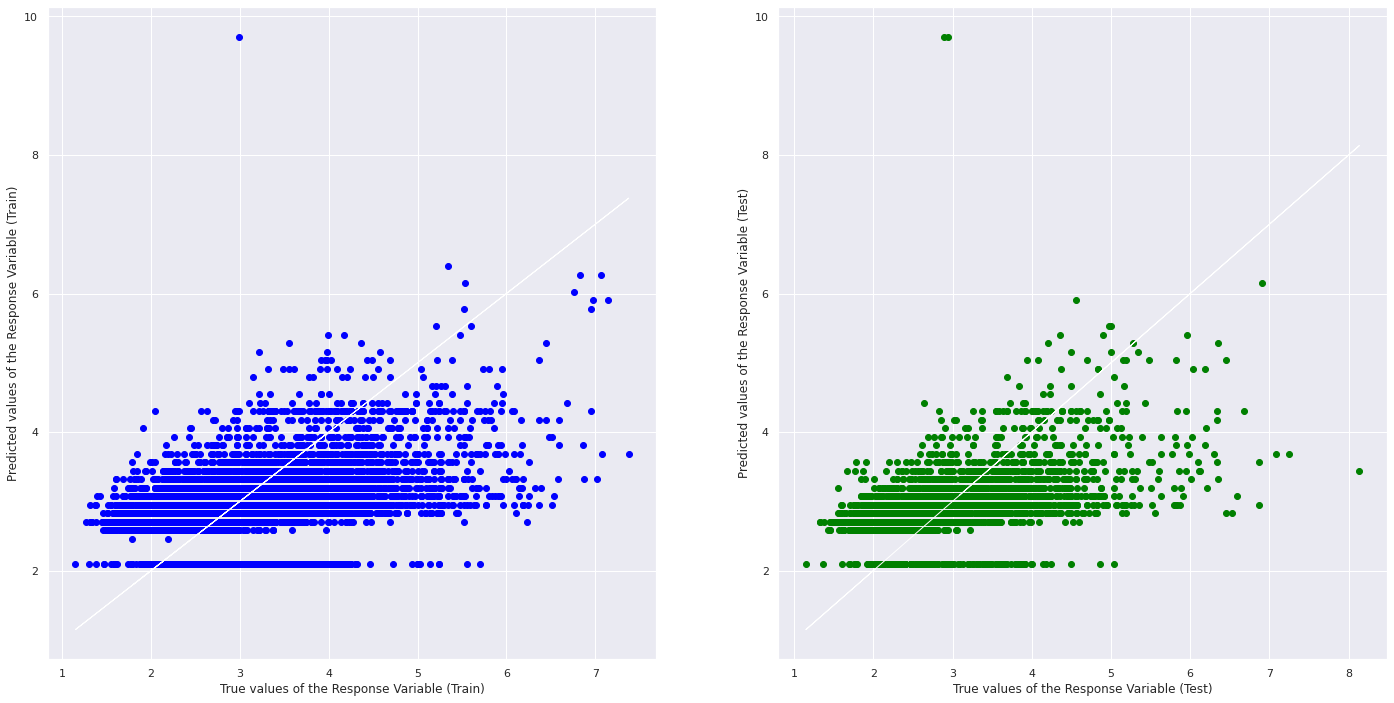

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.23844873855022652
Mean Squared Error (MSE) 	: 0.5904417533762425

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.2469951837808515
Mean Squared Error (MSE) 	: 0.6083916600489827



In [9]:
y = pd.DataFrame(wineNew_ohe['Price'])
y = np.log(y)
X = pd.DataFrame(wineNew_ohe["Year"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Year has a low linear correlation with price in general.

---
### Country (Predictor) vs Price (Response)

Intercept of Regression 	: b =  [-2.8166027e+12]
Coefficients of Regression 	: a =  [[2.8166027e+12 2.8166027e+12 2.8166027e+12 2.8166027e+12 2.8166027e+12
  2.8166027e+12 2.8166027e+12 2.8166027e+12 2.8166027e+12 2.8166027e+12
  2.8166027e+12 2.8166027e+12]]

               Predictors  Coefficients
0       Country_Argentina  2.816603e+12
1       Country_Australia  2.816603e+12
2         Country_Austria  2.816603e+12
3           Country_Chile  2.816603e+12
4          Country_France  2.816603e+12
5         Country_Germany  2.816603e+12
6           Country_Italy  2.816603e+12
7     Country_New Zealand  2.816603e+12
8        Country_Portugal  2.816603e+12
9    Country_South Africa  2.816603e+12
10          Country_Spain  2.816603e+12
11  Country_United States  2.816603e+12



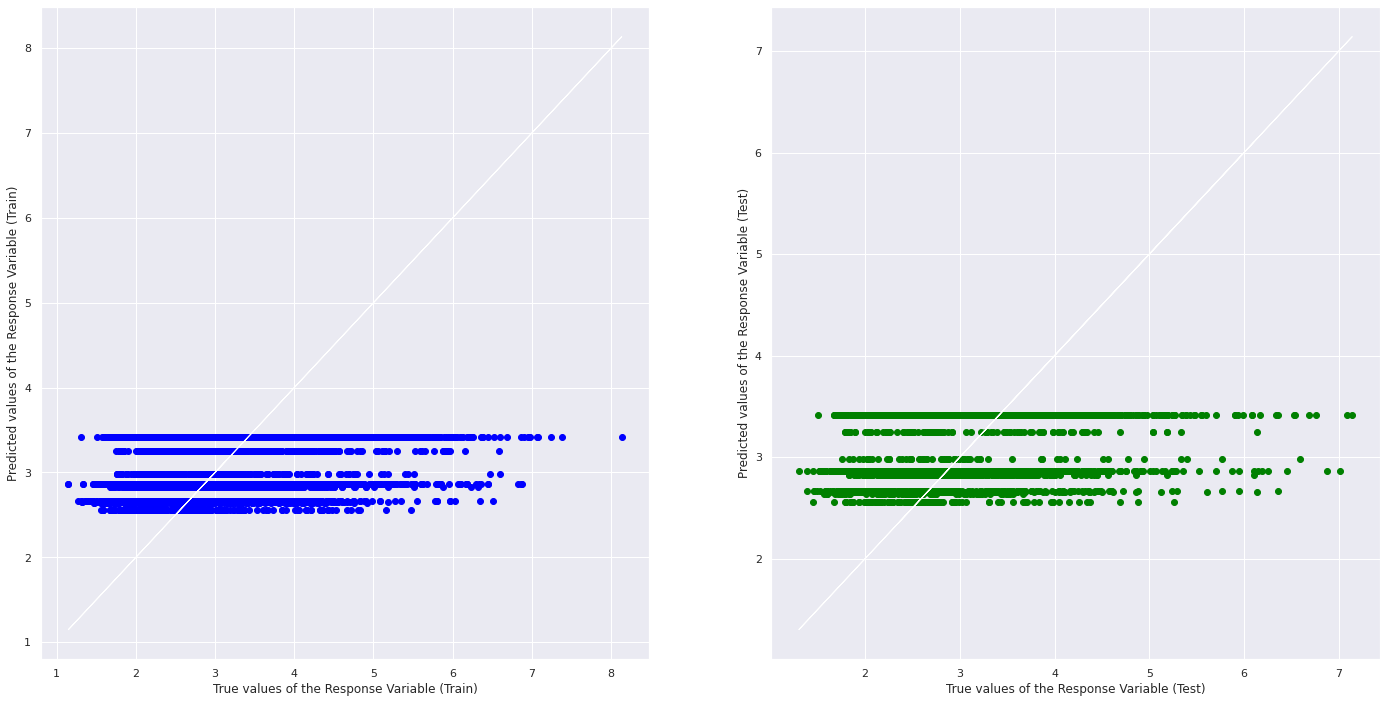

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.11177494587629133
Mean Squared Error (MSE) 	: 0.696125688746614

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.09916930147624181
Mean Squared Error (MSE) 	: 0.7055563576874995



In [10]:
y = pd.DataFrame(wineNew_ohe['Price'])
y = np.log(y)
X = pd.DataFrame(wineNew_ohe[country_list])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Country appears to have the lowest individual correlation to Price. However, it is still effective when combined with other variables in a linear regression model.

---
### Rating (Predictor) vs Price (Response)

Intercept of Regression 	: b =  [-5.57500492]
Coefficients of Regression 	: a =  [[2.20637371]]

  Predictors  Coefficients
0     Rating      2.206374



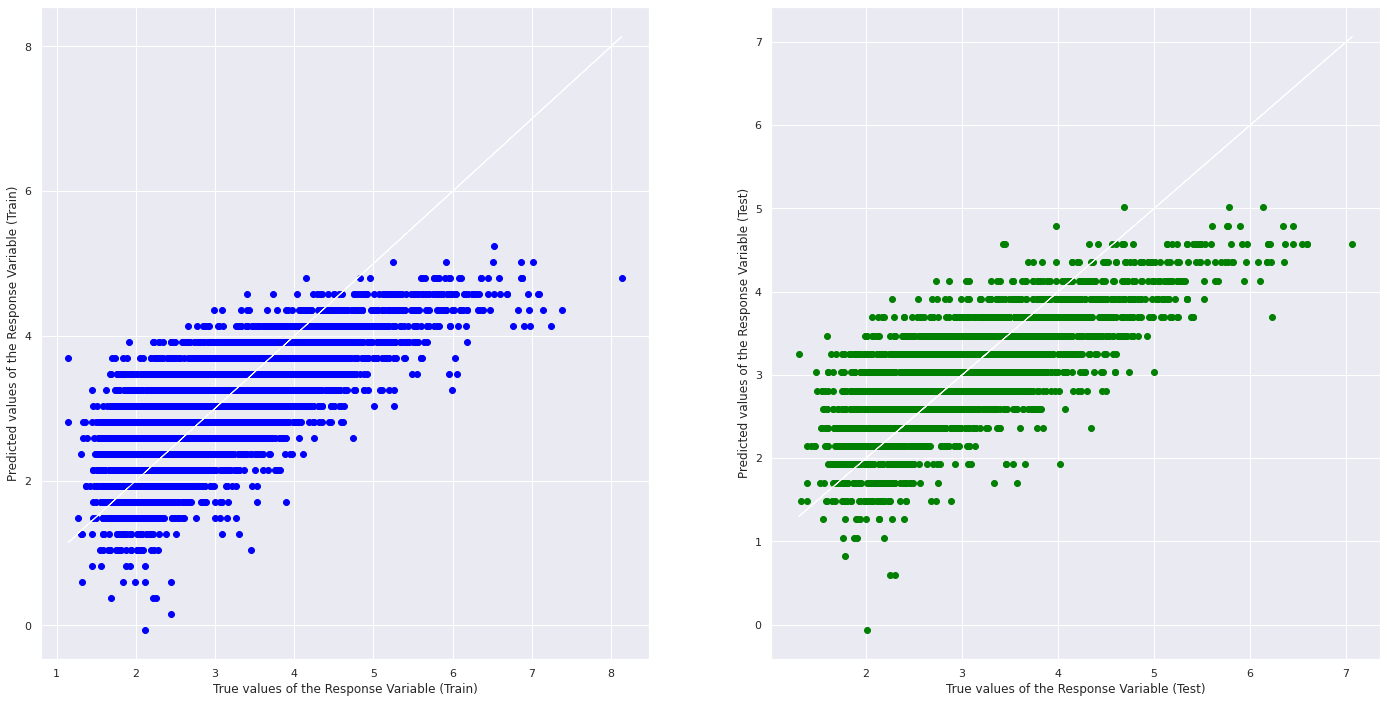

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.545513855002159
Mean Squared Error (MSE) 	: 0.35414225027069407

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5591544142440714
Mean Squared Error (MSE) 	: 0.35114434729432825



In [11]:

y = pd.DataFrame(wineNew_ohe['Price'])
y = np.log(y)
X = pd.DataFrame(wineNew_ohe["Rating"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Rating has a moderate linear correlation with Price and the best individual linear correlation out of all the predictors.

---
### Linear Regression Conclusion

We recommend using all 3 of Year, Rating and Country together to predict price of wine when using linear regression as it has the highest Explained Variance of 0.66. This is in spite of low individual correlations of Year and Country with Price.

# B. Decision Tree
<hr style="border:1px solid gray">

### Rating (Predictor) vs Price (Response)

We will now use the Decision Tree Regressor to map Price to Rating, as they have the highest individual correlation.

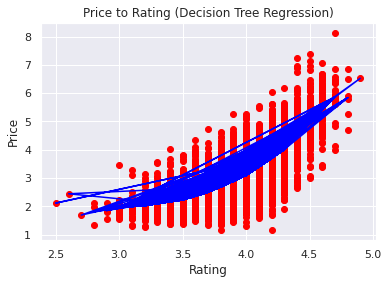

In [12]:
regressor = DecisionTreeRegressor(random_state =0)
X_grid = np.array(X_train_combined['Rating']).reshape(len(X_train_combined['Rating']), 1)
regressor.fit(X_grid, y_train_combined)
export_graphviz(regressor, out_file ='tree.dot', 
               feature_names =['Rating'])

plt.scatter(X_train_combined['Rating'], y_train_combined, color = 'red') 

plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')  

plt.title('Price to Rating (Decision Tree Regression)')  

plt.xlabel('Rating') 

plt.ylabel('Price') 

plt.show() 

In [13]:
score = regressor.score(X_grid, y_train_combined)
print("R-squared:", score) 

mse = mean_squared_error(y_test_combined, regressor.predict(np.array(X_test_combined['Rating']).reshape(len(np.array(X_test_combined['Rating'])), -1)))
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

R-squared: 0.6055988571223294
MSE:  0.30216931807258185
RMSE:  0.15108465903629092


It can be observed that R^2 is relatively high, with a low MSE. Hence, rating is suitable variable to use to predict wine price.

---
### Rating, Year (Predictors) vs Price (Response)

In [14]:
#rating + year
regressor = DecisionTreeRegressor(random_state =0)
X_grid = np.array(X_train_combined[["Year", "Rating"]])#.reshape(len(X_train['Rating']), 1)
regressor.fit(X_grid, y_train_combined)
export_graphviz(regressor, out_file ='tree_rating_year.dot', 
               feature_names =["Year", "Rating"])

In [15]:
#multi-variate attempt tree too big to render
regressor = DecisionTreeRegressor(random_state =0)
X_grid = np.array(X_train_combined[predictors])
regressor.fit(X_grid, y_train_combined)
export_graphviz(regressor, out_file ='tree_multi.dot', 
               feature_names =predictors)

In [16]:
score = regressor.score(X_grid, y_train_combined)
print("R-squared:", score) 

mse = mean_squared_error(y_test_combined, regressor.predict(X_test_combined))
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

R-squared: 0.8048715756785894
MSE:  0.21560106169325705
RMSE:  0.10780053084662852
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


The multi-variate tree is too large to render, hence it is unable to be visualised. However, it can be observed that there is a very high R^2 and low MSE, indicating that this model is highly accurate and well-fitted.

# C. RandomForest
<hr style="border:1px solid gray">

### Year, Rating, Country (Predictors) vs Price (Response)

In [17]:
from sklearn.ensemble import RandomForestRegressor

# Create the Random Forest object
rforest = RandomForestRegressor(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 15)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train_combined, y_train_combined.Price.ravel())
ypred = rforest.predict(X_test_combined)

In [18]:
score = rforest.score(X_train_combined, y_train_combined)
print("R-squared:", score) 

mse = mean_squared_error(y_test_combined, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0)) 

R-squared: 0.8013806999910426
MSE:  0.20267782852425145
RMSE:  0.10133891426212573


Random Forest Regressor is the best prediction model after Decision Tree Regressor, with the highest R^2 of 0.801. However, due to the added comprehensiveness of Random Forest, we recommend users to use this model to predict wine price compared to Decision Trees.

# D. Neural Network
<hr style="border:1px solid gray">

Using the Multi-Layer Perceptron to predict wine values using various variables.

### Rating, Country &amp; Year (Predictor) vs Price (Response)

#### MLPRegressor Fitting

In [19]:

from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn import preprocessing

pred = ["Year", "Rating", "Country_Argentina", "Country_Australia", "Country_Austria", "Country_Chile", "Country_France", "Country_Germany", "Country_Italy", "Country_New Zealand", "Country_Portugal", "Country_South Africa", "Country_Spain", "Country_United States"]

mlp = MLPRegressor(hidden_layer_sizes=(100,),max_iter = 1000)

mlp.fit(X_train_combined, y_train_combined.values.ravel())

y_train_pred_combined = mlp.predict(X_train_combined)
y_test_pred_combined = mlp.predict(X_test_combined)


print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_train_combined, y_train_pred_combined))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_combined, y_train_pred_combined))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_test_combined, y_test_pred_combined))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_combined, y_test_pred_combined))
print()
print(mlp.score(X_test_combined, y_test_combined))
# Plot the Predictions vs the True values


Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: -0.37731034333637337
Mean Squared Error (MSE) 	: 1.08722397795582

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.39777090162478235
Mean Squared Error (MSE) 	: 1.0710759766476161

-0.39777090162478235


#### Results

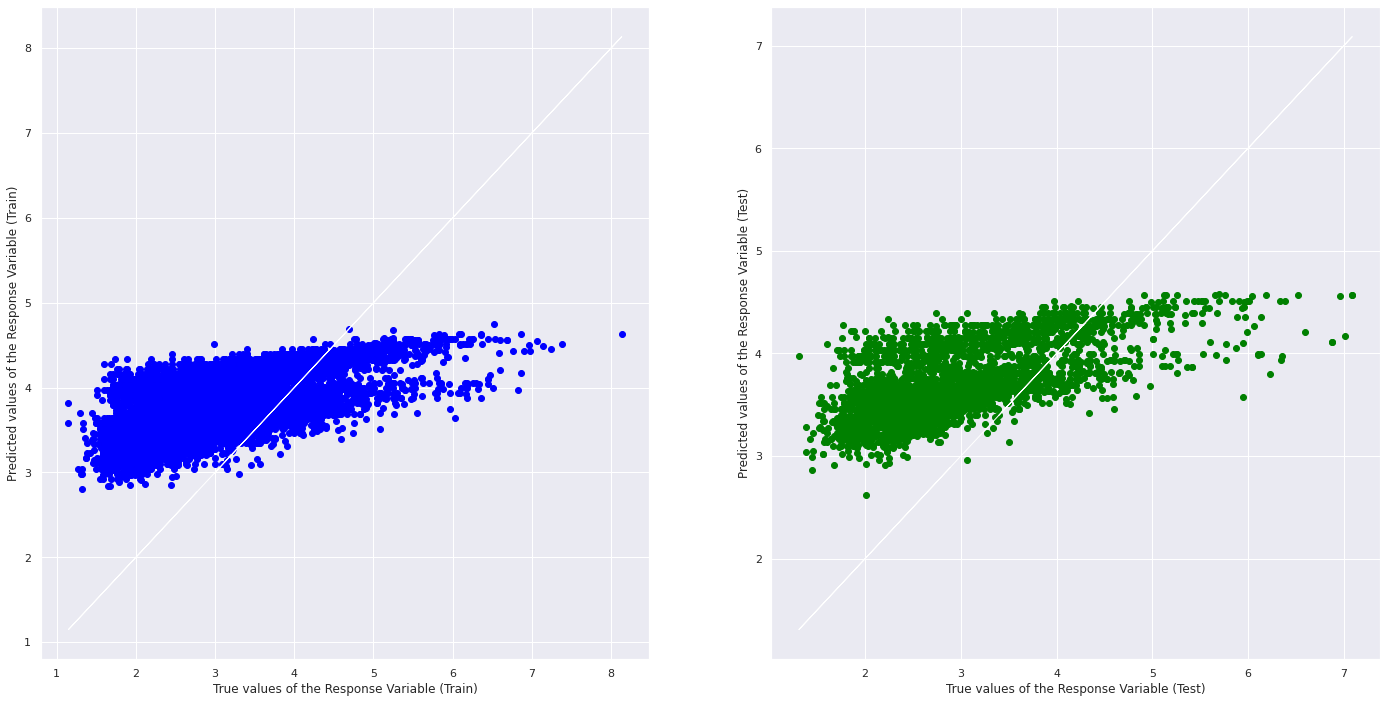

In [20]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_combined, y_train_pred_combined, color = "blue")
axes[0].plot(y_train_combined, y_train_combined, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test_combined, y_test_pred_combined, color = "green")
axes[1].plot(y_test_combined, y_test_combined, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()


Prediction is very poor, with a negative R^2 value and MSE of more than 1. We will now try modelling with different combinations of variables for investigation.

---
### Rating (Predictor) vs Price (Response)

#### MLPRegressor Fitting

In [21]:
pred = ["Rating"]

mlp = MLPRegressor(hidden_layer_sizes=(100,),max_iter = 1000)

Xtrainnew = pd.DataFrame(X_train_combined[pred])
Xtestnew = pd.DataFrame(X_test_combined[pred])
#mlp.fit(X_train.values,y_train)
#y_train_pred
#mlp.predict(X_train.values)
#y_test_pred
#mlp.predict(X_test.values)

#print(res)
mlp.fit(Xtrainnew, y_train_combined.values.ravel())

y_train_pred_combined = mlp.predict(Xtrainnew)
y_test_pred_combined = mlp.predict(Xtestnew)


#res = mlp.predict([[10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])
#print(res)
#print(mlp.score(X_grid, y_train.values.ravel()))

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_train_combined, y_train_pred_combined))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_combined, y_train_pred_combined))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_test_combined, y_test_pred_combined))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_combined, y_test_pred_combined))
print()
print(mlp.score(Xtestnew, y_test_combined))

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5843893675359362
Mean Squared Error (MSE) 	: 0.3280755476022428

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5807171204980117
Mean Squared Error (MSE) 	: 0.3212857122237968

0.5807171204980117


#### Results

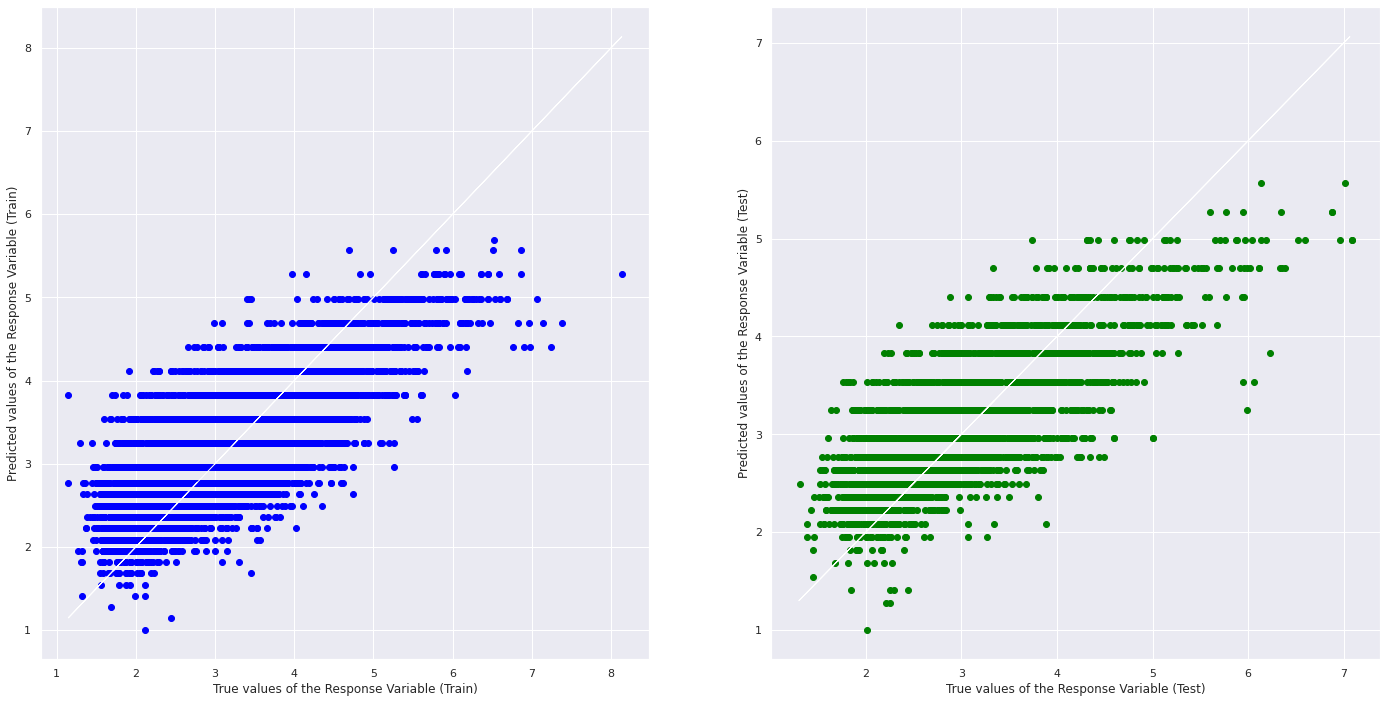

In [22]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_combined, y_train_pred_combined, color = "blue")
axes[0].plot(y_train_combined, y_train_combined, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test_combined, y_test_pred_combined, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()


This is a great improvement from the model that was trained on all variables. However, it is still relatively inaccurate, with a moderately high MSE. Fit is also poor as R^2 is in the range of ~0.50-0.60. However, it can be seen that rating does have a moderately linear positive correlation with price.

---
### Rating and Year (Predictors) vs Price (Response)

#### MLPRegressor Fitting

In [23]:
pred = ["Rating", "Year"]

mlp = MLPRegressor(hidden_layer_sizes=(100,),max_iter = 1000)

Xtrainnew = pd.DataFrame(X_train_combined[pred])
Xtestnew = pd.DataFrame(X_test_combined[pred])
#mlp.fit(X_train.values,y_train)
#y_train_pred
#mlp.predict(X_train.values)
#y_test_pred
#mlp.predict(X_test.values)

#print(res)
mlp.fit(Xtrainnew, y_train_combined.values.ravel())

y_train_pred_combined = mlp.predict(Xtrainnew)
y_test_pred_combined = mlp.predict(Xtestnew)


#res = mlp.predict([[10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])
#print(res)
#print(mlp.score(X_grid, y_train.values.ravel()))

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_train_combined, y_train_pred_combined))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_combined, y_train_pred_combined))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_test_combined, y_test_pred_combined))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_combined, y_test_pred_combined))
print()
print(mlp.score(Xtestnew, y_test_combined))

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.14925113479679197
Mean Squared Error (MSE) 	: 0.6715658311452429

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.1497178078684015
Mean Squared Error (MSE) 	: 0.6515494265224736

0.1497178078684015


#### Results

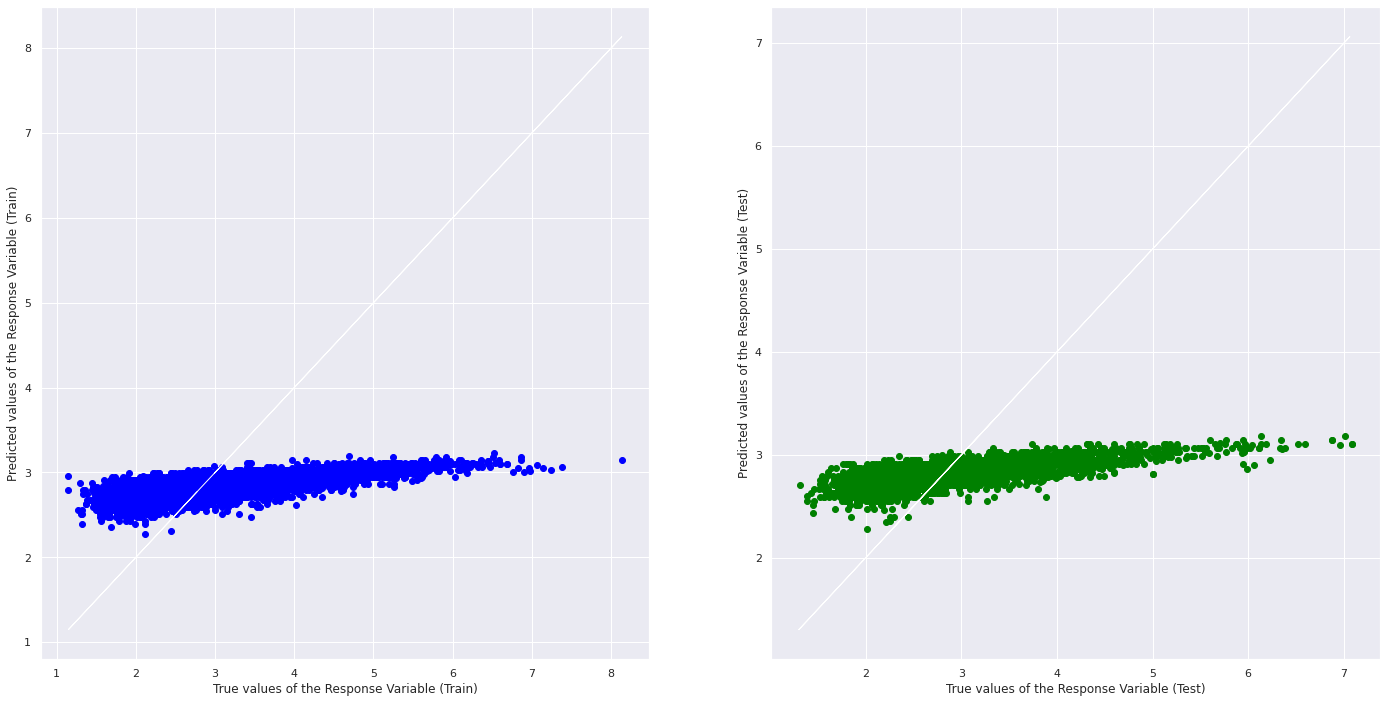

In [24]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_combined, y_train_pred_combined, color = "blue")
axes[0].plot(y_train_combined, y_train_combined, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test_combined, y_test_pred_combined, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()


However, when combining year and rating, accuracy and goodness of fit dropped greatly. This suggests that the "Year" variable may be the contributing factor to such an unstable and poor model. Thus, we will remove the use of "Year" variable.

---
### Rating and Country (Predictors) vs Price (Response)

#### MLPRegressor Fitting

In [25]:
pred = ["Rating"] + country_list

mlp = MLPRegressor(hidden_layer_sizes=(100,),max_iter = 1000)

Xtrainnew = pd.DataFrame(X_train_combined[pred])
Xtestnew = pd.DataFrame(X_test_combined[pred])
#mlp.fit(X_train.values,y_train)
#y_train_pred
#mlp.predict(X_train.values)
#y_test_pred
#mlp.predict(X_test.values)

#print(res)
mlp.fit(Xtrainnew, y_train_combined.values.ravel())

y_train_pred_combined = mlp.predict(Xtrainnew)
y_test_pred_combined = mlp.predict(Xtestnew)


#res = mlp.predict([[10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])
#print(res)
#print(mlp.score(X_grid, y_train.values.ravel()))

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_train_combined, y_train_pred_combined))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_combined, y_train_pred_combined))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_test_combined, y_test_pred_combined))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_combined, y_test_pred_combined))
print()
print(mlp.score(Xtestnew, y_test_combined))

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.6580538598963144
Mean Squared Error (MSE) 	: 0.26992612412217354

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6509335787468513
Mean Squared Error (MSE) 	: 0.26748064194497584

0.6509335787468513


#### Results

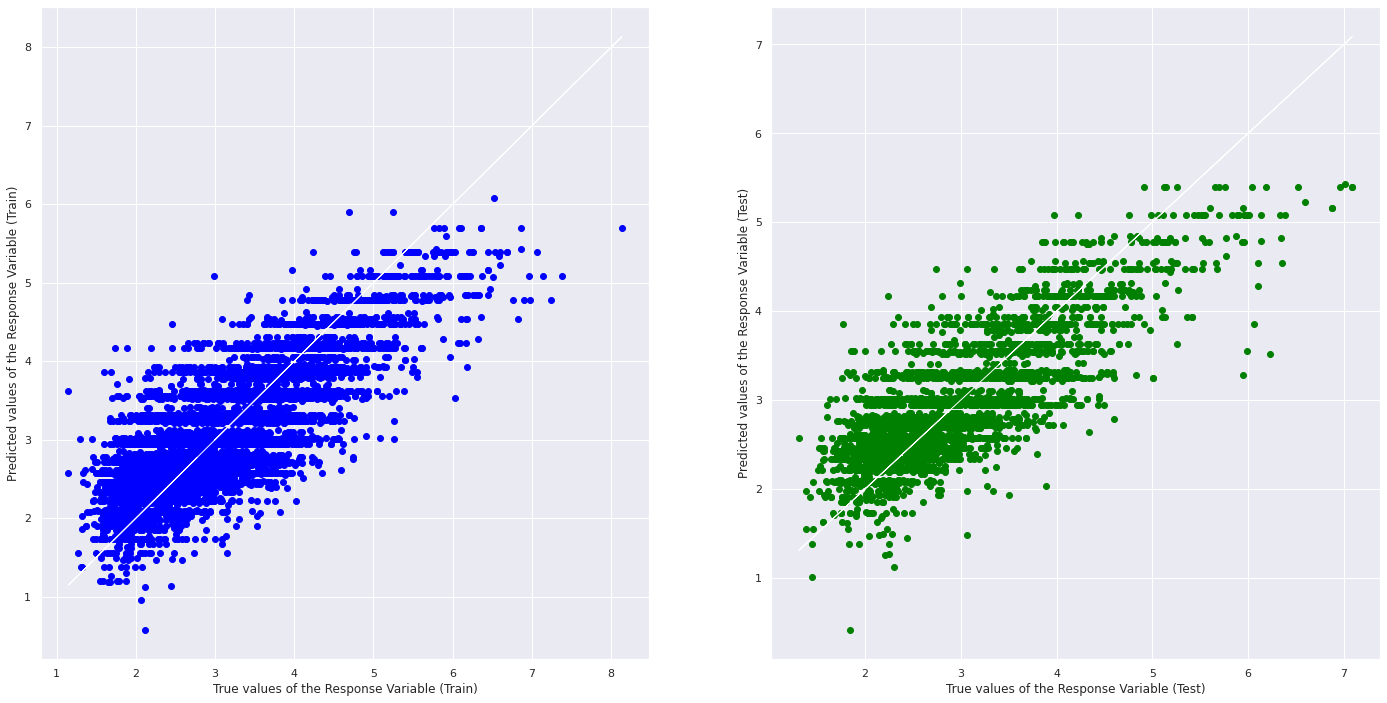

In [26]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_combined, y_train_pred_combined, color = "blue")
axes[0].plot(y_train_combined, y_train_combined, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test_combined, y_test_pred_combined, color = "green")
axes[1].plot(y_test_combined, y_test_combined, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()


It can now be seen that given the current dataset, modelling a neural network based on variables Country and Rating yields the best result. This contrasts with results from the Linear Regression model, where the best result was achieved from training the model based on all variables, including country. Why is this so?


---
### Data Rescaling (Normalisation) for NN

As neural networks use small weights in the model and differences between predictions and expected values, data should be rescaled for a better fit. Hence, we will use MinMaxScaler from sklearn to normalise the input data, such that all values are between 0 and 1, before fitting it into MLPRegressor.

#### Normalising Training Data

In [27]:
from sklearn import preprocessing

v = X_train_combined.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
v_scaled = min_max_scaler.fit_transform(v)
X_train_combined_scaled = pd.DataFrame(v_scaled)

X_train_combined_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.870968,0.500000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.854839,0.750000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.919355,0.458333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.000000,0.291667,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.903226,0.541667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10150,0.774194,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10151,1.000000,0.416667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10152,0.806452,0.583333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10153,0.919355,0.541667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Normalising Test Data

In [28]:
v = X_test_combined.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
v_scaled = min_max_scaler.fit_transform(v)
X_test_combined_scaled = pd.DataFrame(v_scaled)

X_test_combined_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.903226,0.652174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.935484,0.608696,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.919355,0.826087,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.854839,0.565217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.854839,0.652174,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3381,0.903226,0.391304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3382,0.887097,0.478261,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3383,0.887097,0.695652,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3384,0.870968,0.695652,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [44]:
min_max_scaler.scale_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

---
### Training MLPRegressor based on Normalised Data

In [29]:
mlp = MLPRegressor(random_state=1, max_iter=500)#hidden_layer_sizes=(100,),max_iter = 1000)#random_state=1, max_iter=500)

mlp.fit(X_train_combined_scaled, y_train_combined.values.ravel())

y_train_pred_combined = mlp.predict(X_train_combined_scaled)
y_test_pred_combined = mlp.predict(X_test_combined_scaled)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_train_combined, y_train_pred_combined))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train_combined, y_train_pred_combined))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", r2_score(y_test_combined, y_test_pred_combined))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test_combined, y_test_pred_combined))
print()
print(mlp.score(X_test_combined_scaled, y_test_combined))

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7126252621689987
Mean Squared Error (MSE) 	: 0.22684844206700794

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6715102627696901
Mean Squared Error (MSE) 	: 0.25171325695340613

0.6715102627696901


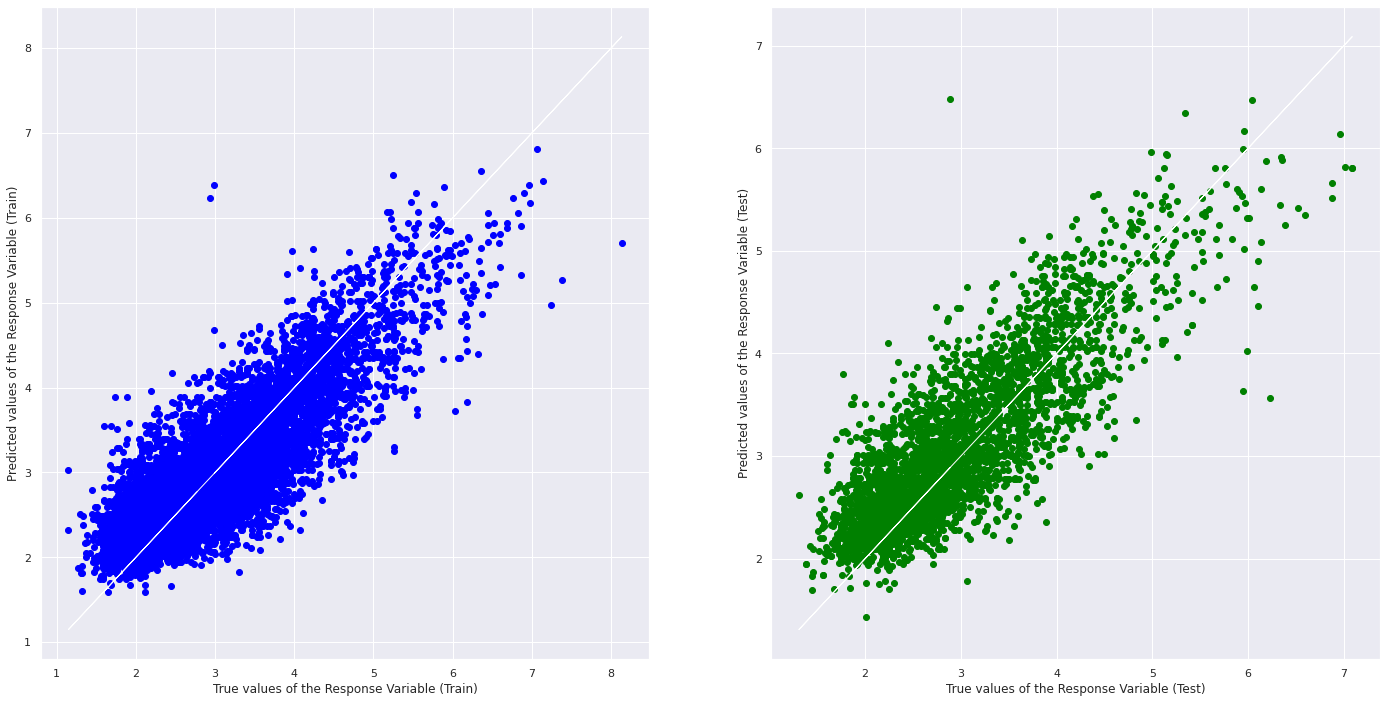

In [30]:
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_combined, y_train_pred_combined, color = "blue")
axes[0].plot(y_train_combined, y_train_combined, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test_combined, y_test_pred_combined, color = "green")
axes[1].plot(y_test_combined, y_test_combined, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()


There is now a large improvement from when Year, Country, and Rating were used without normalisation. However, it is still not as well-fitted as desired. This may be an issue involving overfitting.

# E. Prediction Section for Users
<hr style="border:1px solid gray">

In [31]:
#Input format: float,integer,string
#Taking input for each variable was buggy on Deepnote so we decided to collect input together
user_choice = input("Input rating,year,country: ")
user_choice=user_choice.split(",")
user_country = user_choice[2].strip()
user_year = int(user_choice[1])
user_rating = float(user_choice[0])

---
## Linear Regression Predictor 

In [32]:
def linearPredictor(rating, year, country, country_list):
    user_inputs = [year, rating]
    country = "Country_" + country
    user_predictor_values = user_inputs+ [1 if country==val else 0 for val in country_list]
    return math.exp(linreg_combined.predict(np.array(user_predictor_values).reshape(1,-1)))
print(f"Predicted price of rating={user_rating}, year={user_year}, country={user_country}: {linearPredictor(user_rating, user_year, user_country, country_list)}")

Predicted price of rating=4.3, year=2017, country=France: 53.11396050557075
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


---
## Decision Tree Regressor Predictor

In [33]:
def decisionTreePredictor(rating, year, country, country_list):
    user_inputs = [year, rating]
    country = "Country_" + country
    user_predictor_values = user_inputs+ [1 if country==val else 0 for val in country_list]
    return math.exp(regressor.predict(np.array(user_predictor_values).reshape(1,-1)))
print(f"Predicted price of rating={user_rating}, year={user_year}, country={user_country}: {decisionTreePredictor(user_rating, user_year, user_country, country_list)}")

Predicted price of rating=4.3, year=2017, country=France: 66.61416843992758


---
## Random Forest Regressor Predictor (Recommended)

In [34]:
def randomForestPredictor(rating, year, country, country_list):
    user_inputs = [year, rating]
    country = "Country_" + country
    user_predictor_values = user_inputs+ [1 if country==val else 0 for val in country_list]
    return math.exp(rforest.predict(np.array(user_predictor_values).reshape(1,-1)))
print(f"Predicted price of rating={user_rating}, year={user_year}, country={user_country}: {randomForestPredictor(user_rating, user_year, user_country, country_list)}")

Predicted price of rating=4.3, year=2017, country=France: 67.18541958924497
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5b7597f1-b868-415e-a8ba-1d5a47f19376' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>